In [ ]:
import pandas as pd
import numpy as np
import statistics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier


from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

link = 'documents.xlsx'
df = pd.ExcelFile(link).parse('general_labeled')

df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

In [ ]:
df_filtered = df
df_filtered["ns_label_merged"].replace(['No interest in a T-shirt', 
                                                  'Value alignment', 
                                                  'Non-value-related (price, product, business, quality etc.)', 
                                                  'Nonsense/Confusion/Non-classified', 
                                                  'Describing comparing Beliefs',
                                                'Value alignment and associated process'], ['No Interest', 'Value Alignment', 'Non-value_related', 'Confusion', 'Describing Beliefs',
                                                                                             'Value Alignment+'], inplace=True)

/var/folders/qw/h5qjjyx57sn6pb8_hv0_3_600000gn/T/ipykernel_15571/3801496784.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered["ns_label_merged"].replace(['No interest in a T-shirt',


In [3]:
le.fit(list(df_filtered["ns_label_merged"]))

LabelEncoder()

In [4]:
le.classes_

array(['Confusion', 'Describing Beliefs', 'No Interest',
       'Non-value_related', 'Value Alignment', 'Value Alignment+'],
      dtype='<U18')

In [5]:
df_filtered["ns_label_merged (encoded)"] = le.transform(df_filtered["ns_label_merged"])
df_filtered = df_filtered[["ns_label_merged", "ns_label_merged (encoded)", "narratives_self"]]

In [ ]:
train = df_filtered.sample(frac=0.8, random_state=42).sort_index()

train['narratives_self'] = train['narratives_self'].apply(lambda x: ' '.join(ps.stem(w) for w in x.split()))

,ns_label_merged,ns_label_merged (encoded),narratives_self
0,No Interest,2,"i person do not want that t-shirt, nor do i ne..."
2,Non-value_related,3,i felt that it didn't matter to me too much ab...
3,Confusion,0,"i must admit, i wa rather confused. i couldn't..."
5,Confusion,0,just a guess
6,Describing Beliefs,1,peopl take these survey are gener poor and fra...
...,...,...,...
794,Non-value_related,3,i wa will to pay to make their busi grow
795,Confusion,0,depend on what they were offeing.
796,Non-value_related,3,quality: the seller offer a high qualiti produ...
798,Value Alignment+,5,i don't believ they would donat unless they we...


In [ ]:
test = df_filtered[~df_filtered.index.isin(train.index)]
test['narratives_self'] = test['narratives_self'].apply(lambda x: ' '.join(ps.stem(w) for w in x.split()))

/var/folders/qw/h5qjjyx57sn6pb8_hv0_3_600000gn/T/ipykernel_15571/1923516784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['narratives_self'] = test['narratives_self'].apply(lambda x: ' '.join(ps.stem(w) for w in x.split()))


,ns_label_merged,ns_label_merged (encoded),narratives_self
1,Value Alignment,4,"when a seller is donat to a cause, i tri to fa..."
4,Non-value_related,3,the scenario didn't matter in my decision. i h...
13,Non-value_related,3,at the end of the day everyon ha a million shi...
14,Value Alignment+,5,i'm will to pay a littl more to seller who sup...
20,Non-value_related,3,i don't find a plain t-shirt veri attractive. ...


In [ ]:
tfidf_vectorizer = TfidfVectorizer(
    analyzer="word",
    max_features=800,
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.8,             
    stop_words="english",
    sublinear_tf=True,
    binary=False
)
x_train = tfidf_vectorizer.fit_transform(train["narratives_self"])
x_test = tfidf_vectorizer.transform(test["narratives_self"])

In [ ]:
n_rows, n_cols = 10, 15 
sample = x_train[:n_rows, :n_cols].toarray()

df_view = pd.DataFrame(
    sample,
    columns=tfidf_vectorizer.get_feature_names_out()[:n_cols]
)

,00,10,100,12,15,20,50,abil,abl,abov,accept,accept shirt,accord,account,actual
0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
4,0.0,0.0,0.0,0.0,0.0,0.191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.196
5,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
6,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
7,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
8,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
9,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, train["ns_label_merged (encoded)"])

RandomForestClassifier(random_state=42)

In [11]:
def analysis_result(model_name, 
                    train_prediction,
                    train_target,
                    test_prediction, 
                    test_target):
    from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score
    
    results = dict()
    results["model"] = model_name
    results["train_accuracy"] = accuracy_score(train_prediction, train_target)
    results["balanced_train_accuracy"] = balanced_accuracy_score(train_prediction, train_target)
    results["train_precision"] = precision_score(train_target, train_prediction, average='weighted', zero_division=0)
    results["train_recall"] = recall_score(train_target, train_prediction, average='weighted', zero_division=0)
    results["test_accuracy"] = accuracy_score(test_prediction, test_target)
    results["balanced_test_accuracy"] = balanced_accuracy_score(test_prediction, test_target)
    results["test_precision"] = precision_score(test_target, test_prediction, average='weighted', zero_division=0)
    results["test_recall"] = recall_score(test_target, test_prediction, average='weighted', zero_division=0)

    for key, value in results.items():
        if isinstance(value, str):
            print(f"\n{value}")
        else:
            print(f"\t{key}: {'{:.2f}'.format(value)}")
    
    return results

In [12]:
accumulated_results = []

train_pred_rf = rf.predict(x_train)
test_pred_rf = rf.predict(x_test)

accumulated_results.append(analysis_result("TF-IDF+RandomForest", 
                                           train_pred_rf, 
                                           train['ns_label_merged (encoded)'],
                                           test_pred_rf, 
                                           test['ns_label_merged (encoded)']))


TF-IDF+RandomForest
	train_accuracy: 1.00
	balanced_train_accuracy: 1.00
	train_precision: 1.00
	train_recall: 1.00
	test_accuracy: 0.51
	balanced_test_accuracy: 0.50
	test_precision: 0.53
	test_recall: 0.51


In [13]:
actual_labels = le.inverse_transform(test_pred_rf)

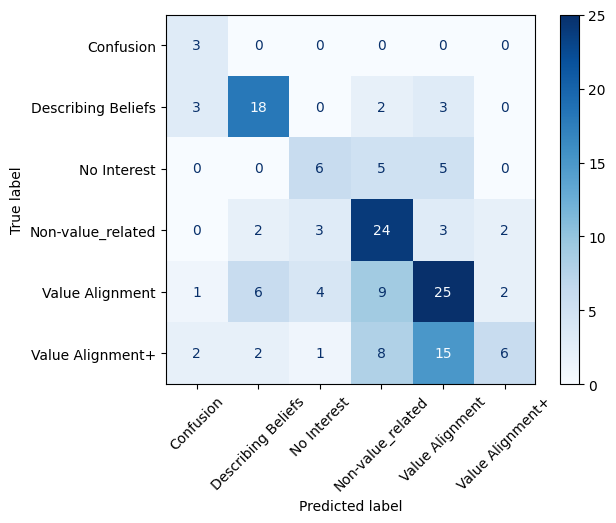

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(test['ns_label_merged'], actual_labels, labels=le.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)

In [15]:
test["predicted_ns_label"] = actual_labels

/var/folders/qw/h5qjjyx57sn6pb8_hv0_3_600000gn/T/ipykernel_15571/2107407266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_ns_label"] = actual_labels


[Text(0, 0, 'Value Alignment'),
 Text(1, 0, 'Non-value_related'),
 Text(2, 0, 'Value Alignment+'),
 Text(3, 0, 'Describing Beliefs'),
 Text(4, 0, 'No Interest'),
 Text(5, 0, 'Confusion')]

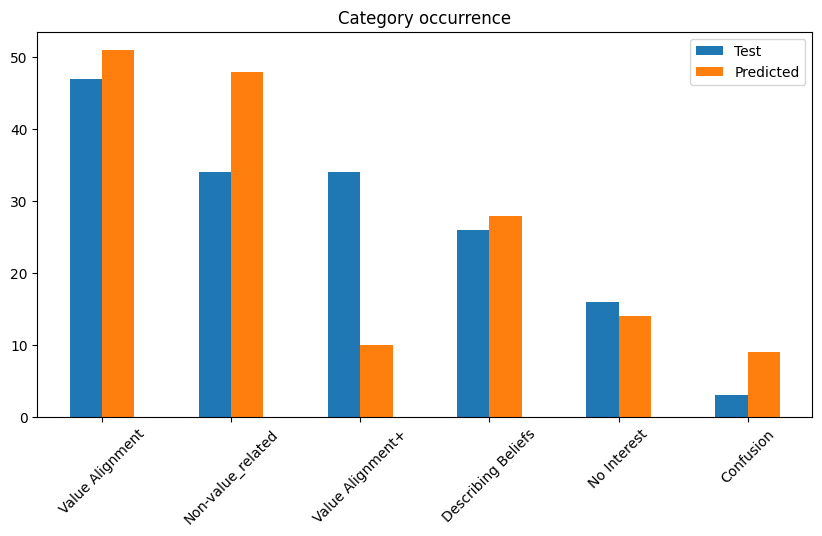

In [16]:
accumulated_category_count_df = pd.concat([
    test["ns_label_merged"].value_counts(),
    test["predicted_ns_label"].value_counts()], 
    axis=1, 
    sort=False,
    keys = ["Test", "Predicted"])
ax = accumulated_category_count_df.plot(kind="bar", figsize=(10,5), title="Category occurrence")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [17]:
test[ 
    (test['predicted_ns_label'] != "Value alignment and associated process") & 
    (test['ns_label_merged'] == "Value alignment and associated process")
][["narratives_self", "ns_label_merged", "predicted_ns_label"]].to_csv("misclassified_top_ns_bow+rf.csv", index=False)

### Neural Network

In [18]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)
model.fit(x_train, train["ns_label_merged (encoded)"])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=-1, num_parallel_tree=None, ...)

In [19]:
train_pred_xgb = model.predict(x_train)
test_pred_xgb = model.predict(x_test)

accumulated_results.append(analysis_result("TF-IDF+XGBoost", 
                                           train_pred_xgb, 
                                           train['ns_label_merged (encoded)'],
                                           test_pred_xgb, 
                                           test['ns_label_merged (encoded)']))


TF-IDF+XGBoost
	train_accuracy: 1.00
	balanced_train_accuracy: 1.00
	train_precision: 1.00
	train_recall: 1.00
	test_accuracy: 0.44
	balanced_test_accuracy: 0.41
	test_precision: 0.45
	test_recall: 0.44
